<a href="https://colab.research.google.com/github/number1angel/tphotel/blob/Tade/Final_Pav%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Librerías para manipulación de datos
import numpy as np
import pandas as pd

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px

# Librerías para Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluación de modelos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Cargar los datos desde el archivo CSV
hotel_data = pd.read_csv('hotel_bookings_demand_TF.csv')

In [3]:
# Mostrar las primeras filas del dataset para entender su estructura
print("Primeras 5 filas del dataset:")
pd.set_option('display.max_columns', None)
hotel_data.head()

Primeras 5 filas del dataset:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342.0,2015.0,July,NaN,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737.0,2015.0,July,27.0,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7.0,2015.0,July,27.0,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13.0,2015.0,July,27.0,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14.0,2015.0,July,27.0,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Mostrar información sobre el dataset
print("\nInformación del dataset:")
hotel_data.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       115809 non-null  float64
 3   arrival_date_year               113421 non-null  float64
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        107451 non-null  float64
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int

In [5]:
# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
hotel_data.describe()


Estadísticas descriptivas:


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,115809.000000,113421.000000,107451.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,103.994327,2016.157272,27.160455,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.872691,0.707472,13.593478,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
# Verificar si hay valores nulos
print("\nValores nulos por columna:")
hotel_data.isnull().sum()


Valores nulos por columna:


,0
hotel,0
is_canceled,0
lead_time,3581
arrival_date_year,5969
arrival_date_month,0
arrival_date_week_number,11939
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [7]:
# 3. Porcentaje de cancelacion
porcentaje_cancelacion = hotel_data['is_canceled'].mean() * 100
print(f"\nPorcentaje de cancelacion: {porcentaje_cancelacion:.2f}%")


Porcentaje de cancelacion: 37.04%


In [8]:
# 4. ¿Cuáles son las columnas disponibles en el dataset?
columnas = hotel_data.columns
print("\nColumnas disponibles:")
print(list(columnas))


Columnas disponibles:
['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


/tmp/ipython-input-9-1059339351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentage.index, y=percentage, palette=['orange', 'lightgreen']) #corregir color


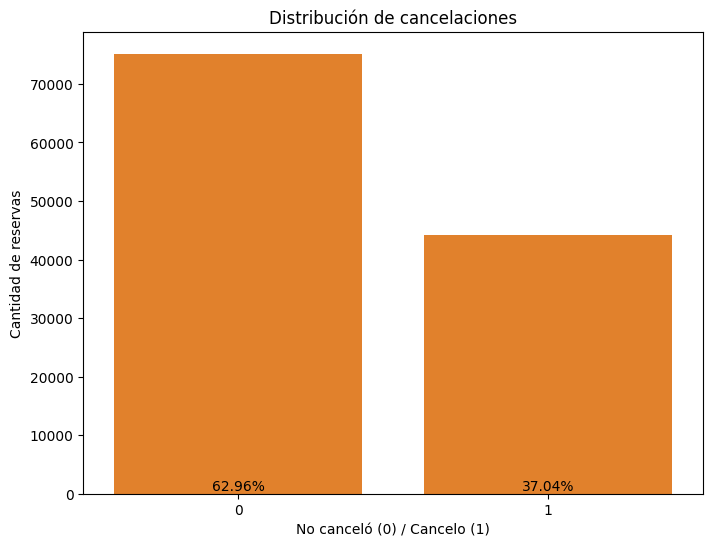

In [9]:
# Calculo del porcentaje
percentage = hotel_data['is_canceled'].value_counts(normalize=True) * 100

# Gráfico de conteo de cancelaciones
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['orange', 'lightgreen']) #corregir color
sns.countplot(x='is_canceled', data=hotel_data)
plt.title('Distribución de cancelaciones')
plt.xlabel('No canceló (0) / Cancelo (1)')
plt.ylabel('Cantidad de reservas')

# Mostrar el porcentaje
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

Tambien podemos Analizar a donde viajaron los huespedes, y a que tipo de alojamiento se inclinaron segun la temporada

In [12]:
country_wise_guests = hotel_data[hotel_data['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,KIR,1
161,ATF,1
162,TJK,1
163,SLE,1


In [15]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

Personas de todo el mundo se estan quedando en esos 2 tipos de alojamiento. En especifico en portugal y otros paises de europa se ve una gran concentracion de turistas

Ambos tipos de alojamiento tienen distintos tipos de servicios a la habitacion y otros factores, ademas de que la temporada hara que los valores por tipo de habitacion varien muchisimo

In [16]:
data = hotel_data[hotel_data['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

Las figuras muestran como variara el precio por noche de cada habitacion y su desviacion estandar. A concitnuacion veremos como variara el precio a lo largo del año

In [17]:
data_resort = hotel_data[(hotel_data['hotel'] == 'Resort Hotel') & (hotel_data['is_canceled'] == 0)]
data_city = hotel_data[(hotel_data['hotel'] == 'City Hotel') & (hotel_data['is_canceled'] == 0)]

In [18]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [19]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [20]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


Nos podemos dar cuenta de que la columna meses no esta en orden, asi q la ordenaremos para sacar conclusiones mas precisas

In [21]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays
import sort_dataframeby_monthorweek as sd

def sort_month(hotel_data, column_name):
    return sd.Sort_Dataframeby_Month(hotel_data, column_name)

  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3419 sha256=d0a10a97d071c2d6dd4d6673bca9651f05407e5e39d9f12c402f4f3a79005b03
  Stored in directory: /root/.cache/pip/wheels/ac/4c/ca/134c7282a08e7e2b149b1da1975c6686a262c15a92b78adcc7
Successfully built sort-dataframeby-monthorweek
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3225 sha256=d4a72dd363bac96966235757a22bf8dbf1fc891f4558ba6414387b1e2f29ae4a
  Stored in directory: /root/.cache/pip/wheels/4d/4f/f5/d9e3e3e60d80b3cdc2f69dfcf0d4bc45257abdea94f2035dbb
Successfully built sorted-months-weekdays


In [22]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


In [23]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1700x800 with 0 Axes>

El grafico nos deja a simple vista como los precios en un hotel del tipo resort escalan muchisimo mas que los de un hotel de ciudad  duranteel verano. y que los hoteles de ciudad tienden a variar menos en sus valores, con una pequeña subida durante la primavera y el verano

Cuales son los meses con mayor cantidad de huespedes?

In [24]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [25]:
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests
final_guests = sort_month(final_guests,'month')
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


In [26]:
px.line(final_guests, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months', template = 'plotly_dark')

El hotel de ciudad recibe más huéspedes durante la primavera y el otoño, cuando los precios también son más altos. En julio y agosto hay menos visitantes, aunque los precios son más bajos.
El número de huéspedes del hotel Resort disminuye ligeramente de junio a septiembre, que también es cuando los precios son más altos. Ambos hoteles reciben menos huéspedes durante el invierno.

Cuanto dura la estadia en cada uno?

In [27]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

/tmp/ipython-input-27-2817623328.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342.0,2015.0,July,NaN,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737.0,2015.0,July,27.0,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7.0,2015.0,July,27.0,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13.0,2015.0,July,27.0,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14.0,2015.0,July,27.0,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [28]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


In [29]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

Las estadias en hoteles de ciudad son mas abundantes, aunque las estadias en resorts tienden a ser mas longevas

Grafico de calor para buscar relacion entre columnas del data set

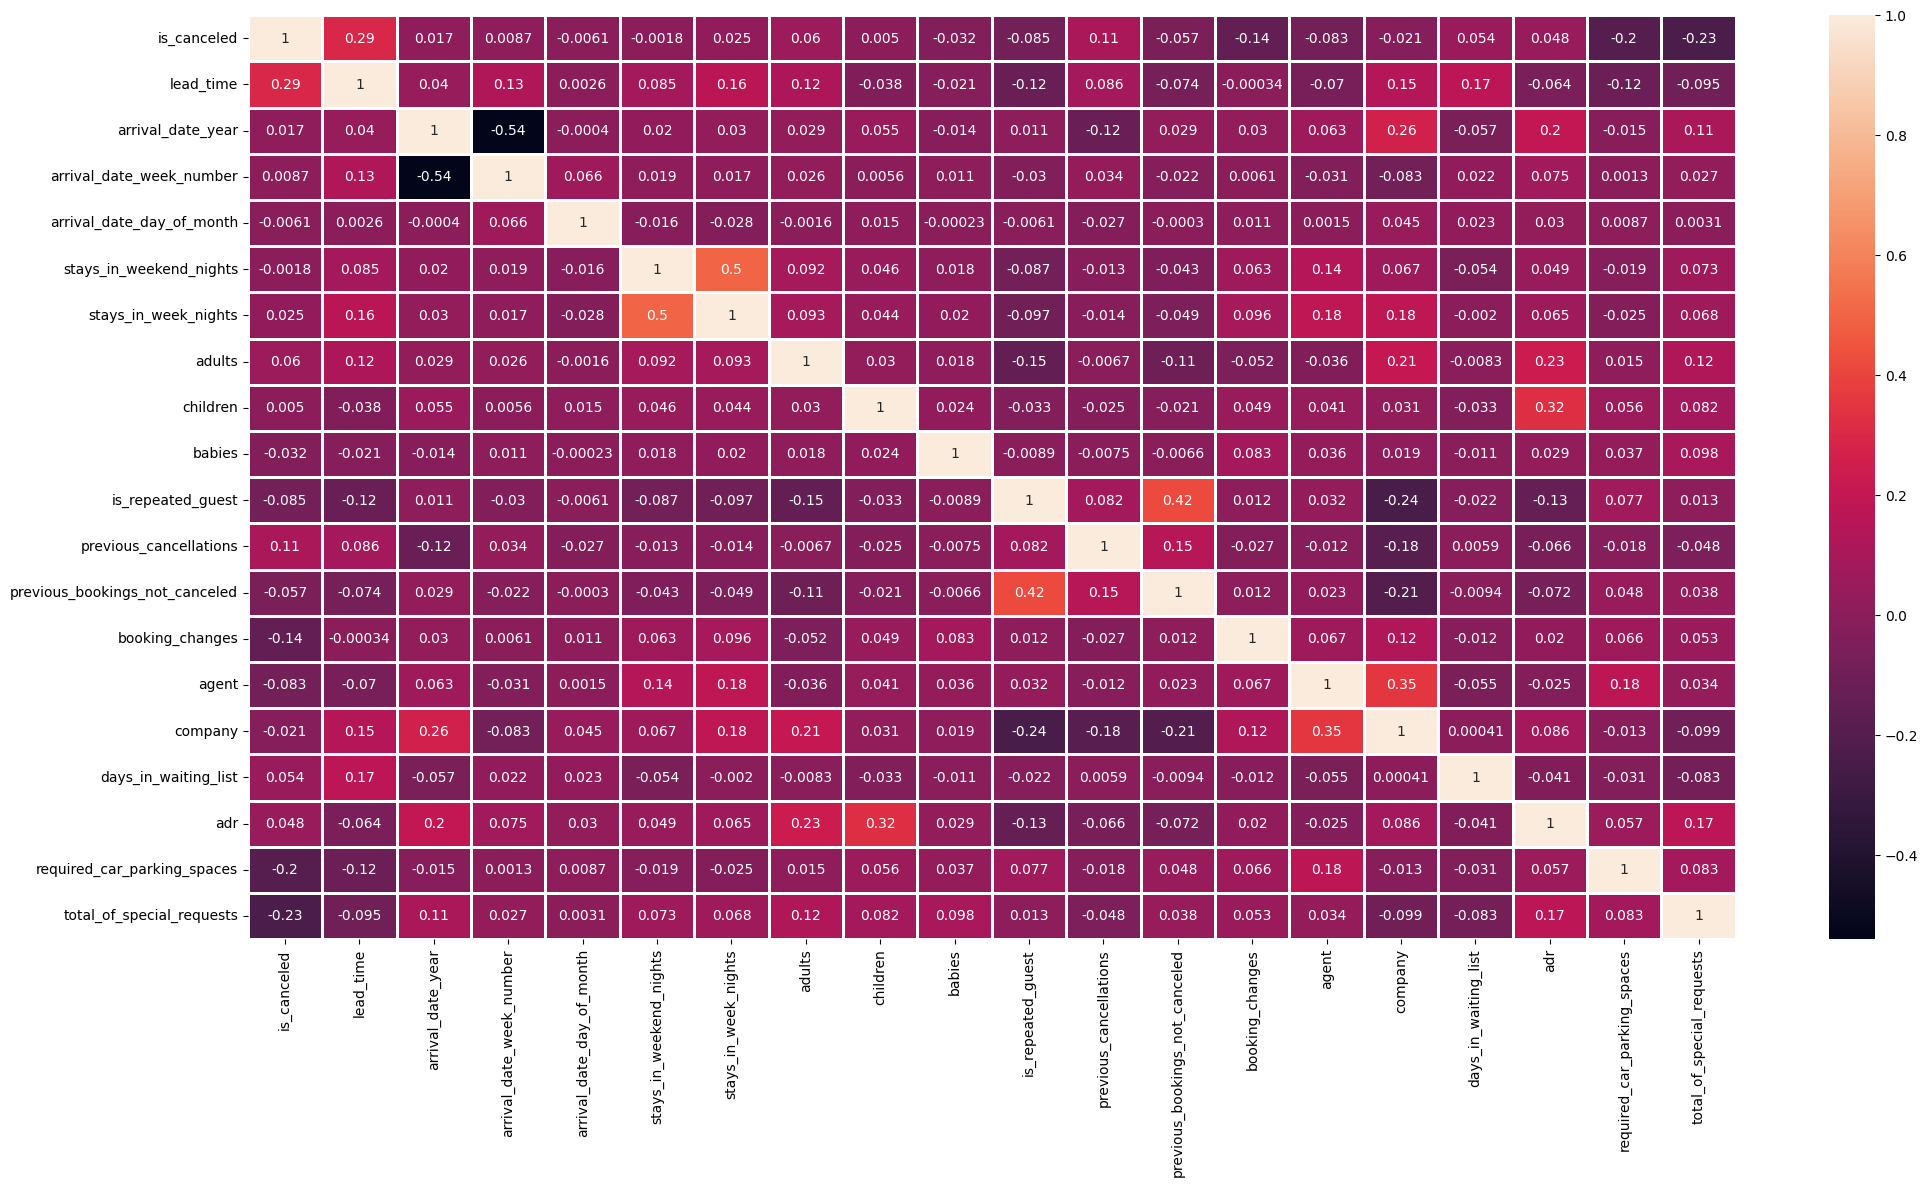

In [30]:
plt.figure(figsize = (24, 12))

# Select only numerical columns for correlation calculation
numerical_hotel_data = hotel_data.select_dtypes(include=np.number)
corr = numerical_hotel_data.corr()

sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
#para el analisis de datos dejar el country, agent y company

In [ ]:
#arrival, realizar analisis de datos lupe

In [ ]:
hotel_data = hotel_data.drop(['arrival_date_year',	'arrival_date_month',	'arrival_date_week_number',	'arrival_date_day_of_month'], axis=1)

In [ ]:
hotel_data = hotel_data.drop(['babies'], axis=1)

In [ ]:
hotel_data = hotel_data.drop(['country'], axis=1)

In [ ]:
hotel_data = hotel_data.drop(['meal'], axis=1)

In [ ]:
hotel_data = hotel_data.drop(['assigned_room_type'], axis=1)

In [ ]:
hotel_data = hotel_data.drop(['reservation_status'], axis=1)

In [ ]:
hotel_data = hotel_data.drop(['company', 'agent'], axis=1)

In [ ]:
hotel_data = hotel_data.drop(['required_car_parking_spaces','reservation_status_date'], axis=1)

In [ ]:
# Basandonos en la informacion sobre el dataset, agrupar las variables categoricas en una lista
categorical_columns_semantics = [
  'hotel',
  'is_canceled',
  'market_segment',
  'distribution_channel',
  'is_repeated_guest',
  'reserved_room_type',
  'deposit_type'
  ]

# Convertir las variables en objects
for column in categorical_columns_semantics:
  if column in hotel_data.columns:
    hotel_data[column] = hotel_data[column].astype(str)

# Verificar
hotel_data.dtypes

,0
hotel,object
is_canceled,object
lead_time,float64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64
children,float64
market_segment,object
distribution_channel,object
is_repeated_guest,object


In [ ]:
# Obtener la estadistica descriptiva de las variables numericas
hotel_data.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,115809.0,103.994327,106.872691,0.00,18.00,69.000,160.0,737.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.00,0.000,0.0,26.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.00,0.000,0.0,72.0
booking_changes,119390.0,0.221124,0.652306,0.00,0.00,0.000,0.0,21.0
days_in_waiting_list,119390.0,2.321149,17.594721,0.00,0.00,0.000,0.0,391.0
adr,119390.0,101.831122,50.535790,-6.38,69.29,94.575,126.0,5400.0


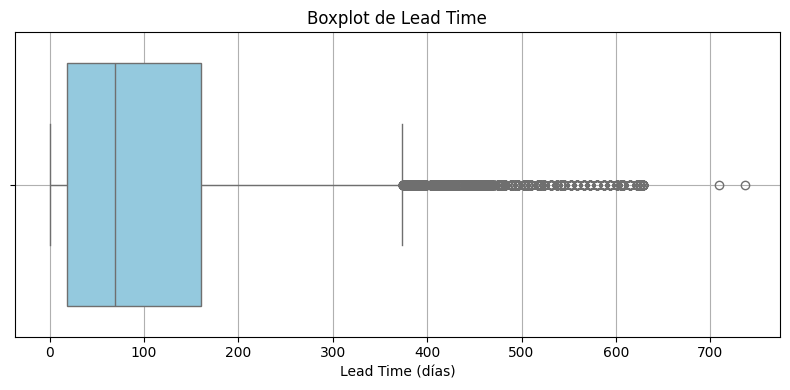

In [ ]:
# Vemos una diferencia entre la media y la mediana, asi que hacemos un grafico de caja para observar la distribucion
plt.figure(figsize=(8, 4))
sns.boxplot(x=hotel_data['lead_time'], color="skyblue")
plt.title('Boxplot de Lead Time')
plt.xlabel('Lead Time (días)')
plt.grid(True)
plt.tight_layout()
plt.show()

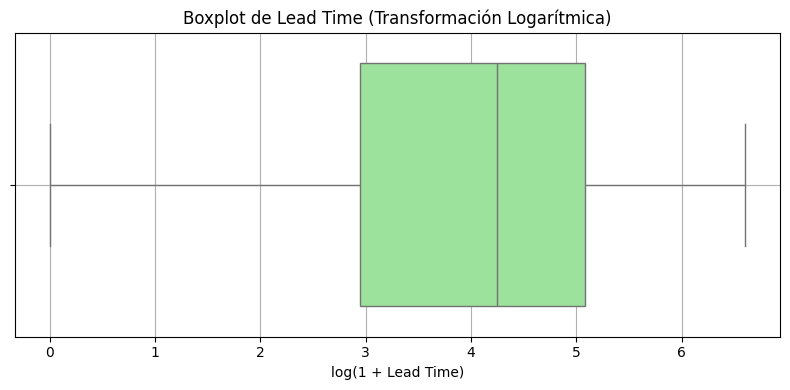

In [ ]:
# Aplicar transformación logarítmica (suma 1 para evitar log(0))
hotel_data['lead_time'] = np.log1p(hotel_data['lead_time'])

# Boxplot de la columna transformada
plt.figure(figsize=(8, 4))
sns.boxplot(x=hotel_data['lead_time'], color="lightgreen")
plt.title('Boxplot de Lead Time (Transformación Logarítmica)')
plt.xlabel('log(1 + Lead Time)')
plt.grid(True)
plt.tight_layout()
plt.show()

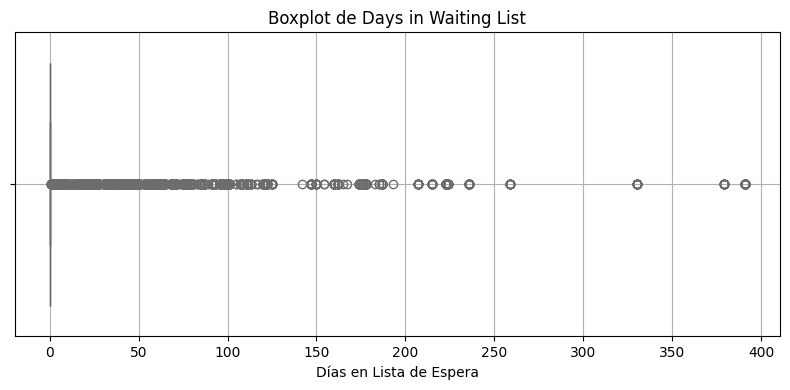

In [ ]:
#Al igual que en lead time, vemos la distribucion de los días en lista de espera
plt.figure(figsize=(8, 4))
sns.boxplot(x=hotel_data['days_in_waiting_list'], color="salmon")
plt.title('Boxplot de Days in Waiting List')
plt.xlabel('Días en Lista de Espera')
plt.grid(True)
plt.tight_layout()
plt.show()

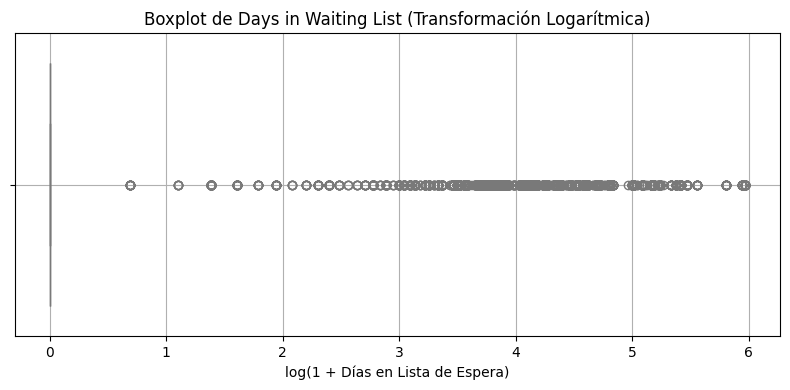

In [ ]:
# Aplicar transformación logarítmica: log(1 + x)
hotel_data['days_in_waiting_list'] = np.log1p(hotel_data['days_in_waiting_list'])

# Boxplot de la columna transformada
plt.figure(figsize=(8, 4))
sns.boxplot(x=hotel_data['days_in_waiting_list'], color="lightblue")
plt.title('Boxplot de Days in Waiting List (Transformación Logarítmica)')
plt.xlabel('log(1 + Días en Lista de Espera)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
hotel_data = hotel_data.drop(['days_in_waiting_list'], axis=1)

In [ ]:
# Lista de variables numéricas a normalizar logarítmicamente (excepto lead_time)
variables_a_log = [
  'stays_in_weekend_nights',
  'stays_in_week_nights',
  'adults',
  'children',
  'previous_cancellations',
  'previous_bookings_not_canceled',
  'booking_changes',
  'adr',
  'total_of_special_requests'
]

# Aplicar log1p (log(1 + x)) a cada variable
for col in variables_a_log:
  hotel_data[col] = np.log1p(hotel_data[col])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
columnas = hotel_data.columns
print("\nColumnas disponibles:")
print(list(columnas))


Columnas disponibles:
['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'booking_changes', 'deposit_type', 'customer_type', 'adr', 'total_of_special_requests']


In [ ]:
# Analizamos datos inconsistentes
# Se pueden agregar topes para categorias como niños en 7 o más
noisy_data = {
  'lead_time': hotel_data[hotel_data['lead_time'] < 0],
  'stays_in_weekend_nights': hotel_data[hotel_data['stays_in_weekend_nights'] < 0],
  'stays_in_week_nights': hotel_data[hotel_data['stays_in_week_nights'] < 0],
  'adults': hotel_data[hotel_data['adults'] <= 0], #rever
  'children': hotel_data[hotel_data['children'] < 0],
  'previous_cancellations': hotel_data[hotel_data['previous_cancellations'] < 0],
  'previous_bookings_not_canceled': hotel_data[hotel_data['previous_bookings_not_canceled'] < 0],
  'booking_changes': hotel_data[hotel_data['booking_changes'] < 0],
  'total_of_special_requests': hotel_data[hotel_data['total_of_special_requests'] < 0],
  'adr': hotel_data[hotel_data['adr'] < 0]
}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count



NameError: name 'hotel_data' is not defined

In [ ]:
# Elimina las 403 filas con valores negativos o iguales a 0
hotel_data = hotel_data[hotel_data['adults'] > 0]

In [ ]:
# Chequeamos haber sacado todo
noisy_data = {
  'lead_time': hotel_data[hotel_data['lead_time'] < 0],
  'stays_in_weekend_nights': hotel_data[hotel_data['stays_in_weekend_nights'] < 0],
  'stays_in_week_nights': hotel_data[hotel_data['stays_in_week_nights'] < 0],
  'adults': hotel_data[hotel_data['adults'] <= 0], #rever
  'children': hotel_data[hotel_data['children'] < 0],
  'previous_cancellations': hotel_data[hotel_data['previous_cancellations'] < 0],
  'previous_bookings_not_canceled': hotel_data[hotel_data['previous_bookings_not_canceled'] < 0],
  'booking_changes': hotel_data[hotel_data['booking_changes'] < 0],
  'total_of_special_requests': hotel_data[hotel_data['total_of_special_requests'] < 0],
}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count


{'lead_time': 0,
 'stays_in_weekend_nights': 0,
 'stays_in_week_nights': 0,
 'adults': 0,
 'children': 0,
 'previous_cancellations': 0,
 'previous_bookings_not_canceled': 0,
 'booking_changes': 0,
 'total_of_special_requests': 0}

In [ ]:
#Terminadas las variables ordinales pasamos a las nominales

In [ ]:
columnas = hotel_data.columns
print("\nColumnas disponibles:")
print(list(columnas))


Columnas disponibles:
['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'booking_changes', 'deposit_type', 'customer_type', 'adr', 'total_of_special_requests']


In [ ]:
# One-hot encoding en columnas especificas
one_hot_cols = ['hotel', 'market_segment', 'distribution_channel', 'is_repeated_guest','reserved_room_type', 'deposit_type', 'customer_type']
hotel_data = pd.get_dummies(hotel_data, columns=one_hot_cols, drop_first=True)

hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118987 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118987 non-null  object 
 1   lead_time                       115424 non-null  float64
 2   stays_in_weekend_nights         118987 non-null  float64
 3   stays_in_week_nights            118987 non-null  float64
 4   adults                          118987 non-null  float64
 5   children                        118983 non-null  float64
 6   previous_cancellations          118987 non-null  float64
 7   previous_bookings_not_canceled  118987 non-null  float64
 8   booking_changes                 118987 non-null  float64
 9   adr                             118986 non-null  float64
 10  total_of_special_requests       118987 non-null  float64
 11  hotel_Resort Hotel              118987 non-null  bool   
 12  market_segment_Comple

/tmp/ipython-input-38-3139350907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentage.index, y=percentage, palette=['orange', 'lightgreen']) #corregir color


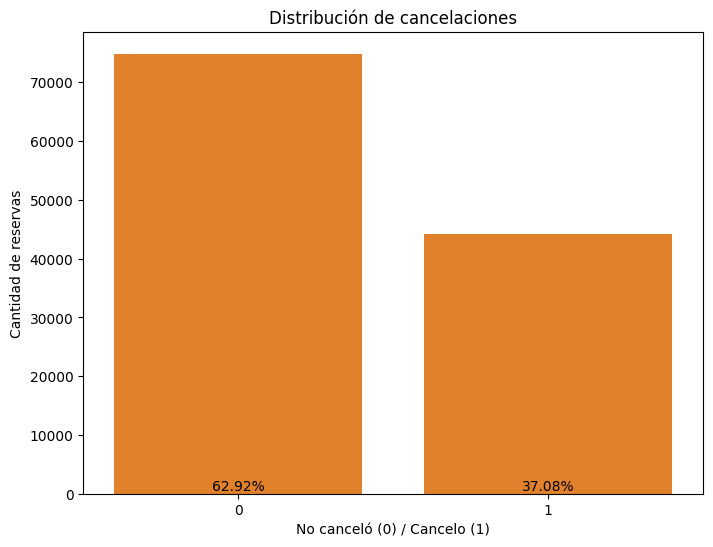

In [ ]:
# Calculo del porcentaje nuevo
percentage = hotel_data['is_canceled'].value_counts(normalize=True) * 100

# Gráfico de conteo de cancelaciones nuevas
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['orange', 'lightgreen']) #corregir color
sns.countplot(x='is_canceled', data=hotel_data)
plt.title('Distribución de cancelaciones')
plt.xlabel('No canceló (0) / Cancelo (1)')
plt.ylabel('Cantidad de reservas')

# Mostrar el porcentaje nuevo
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

In [ ]:
# Inspeccionar valores faltantes por columna
missing_values = hotel_data.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values[missing_values > 0])

Valores faltantes por columna:
lead_time    3563
children        4
adr             1
dtype: int64


In [ ]:
# Imputar NaN con mediana en las 3 variables
hotel_data['lead_time'] = hotel_data['lead_time'].fillna(hotel_data['lead_time'].median())
hotel_data['children'] = hotel_data['children'].fillna(hotel_data['children'].median())
hotel_data['adr'] = hotel_data['adr'].fillna(hotel_data['adr'].median())

# Comprobar que no queden más NaN en esas columnas
print(hotel_data[['lead_time', 'children', 'adr']].isnull().sum())

lead_time    0
children     0
adr          0
dtype: int64


In [ ]:
# Definir la variable objetivo y las características
y = hotel_data['is_canceled']  # Variable objetivo
X = hotel_data.drop(['is_canceled'], axis=1)  # Características

print("Dimensiones de las características (X):", X.shape)
print("Dimensiones de la variable objetivo (y):", y.shape)

Dimensiones de las características (X): (118987, 36)
Dimensiones de la variable objetivo (y): (118987,)


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba (20% y 80%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Mostrar las dimensiones de los conjuntos resultantes
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (95189, 36)
Dimensiones de X_test: (23798, 36)
Dimensiones de y_train: (95189,)
Dimensiones de y_test: (23798,)


#### Regresión Logística

In [ ]:
# Inicializar los modelos
logistic_model = LogisticRegression(random_state=42)

# Entrenar los modelos con los datos de entrenamiento
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier(random_state=42)

In [ ]:
# Hacer predicciones en el conjunto de prueba
logistic_predictions = logistic_model.predict(X_test)

# Calcular la precisión de cada modelo
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

# Mostrar los resultados
print(f"Precisión de la Regresión Logística: {logistic_accuracy:.4f}")

Precisión de la Regresión Logística: 0.8074
Precisión del Bosque Aleatorio: 0.8449
Precisión del Árbol de Decisión: 0.8076


Random Forest

In [ ]:
# Inicializar los modelos
random_forest_model = RandomForestClassifier(random_state=42)

# Entrenar los modelos con los datos de entrenamiento

random_forest_model.fit(X_train, y_train)

In [ ]:
# Hacer predicciones en el conjunto de prueba
random_forest_predictions = random_forest_model.predict(X_test)

# Calcular la precisión de cada modelo
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

# Mostrar los resultados
print(f"Precisión del Bosque Aleatorio: {random_forest_accuracy:.4f}")

Decisional Tree

In [ ]:
# Inicializar los modelos
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar los modelos con los datos de entrenamiento
decision_tree_model.fit(X_train, y_train)

In [ ]:
# Hacer predicciones en el conjunto de prueba
decision_tree_predictions = decision_tree_model.predict(X_test)

# Calcular la precisión de cada modelo
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

# Mostrar los resultados
print(f"Precisión del Árbol de Decisión: {decision_tree_accuracy:.4f}")

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    """Función para graficar la matriz de confusión."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No comestible', 'Comestible'],
                yticklabels=['No comestible', 'Comestible'])
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()

# Hacer predicciones (si no las hiciste en el paso anterior)
logistic_predictions = logistic_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Calcular y graficar la matriz de confusión para cada modelo
plot_confusion_matrix(y_test, logistic_predictions, 'Regresión Logística')
plot_confusion_matrix(y_test, random_forest_predictions, 'Bosque Aleatorio')
plot_confusion_matrix(y_test, decision_tree_predictions, 'Árbol de Decisión')

In [ ]:
# Análisis de correlación
plt.figure(figsize=(12, 10))
# Seleccionamos columnas numéricas (incluyendo las creadas por get_dummies) para la matriz de correlación
# Los tipos comunes para las columnas dummy son 'uint8' o 'bool'
numeric_cols = hotel_data.select_dtypes(include=['int64', 'float64', 'uint8', 'bool']).columns
correlation = hotel_data[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()